In [116]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler


In [117]:
pip install --upgrade scikit-learn imbalanced-learn

1469550.22s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
Note: you may need to restart the kernel to use updated packages.


Dataset:
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

In [118]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [119]:
df['Outcome'].unique()

array([1, 0])

In [120]:
columns = df.columns[:-1]
print(df.columns)
df.columns = df.columns.str.strip()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


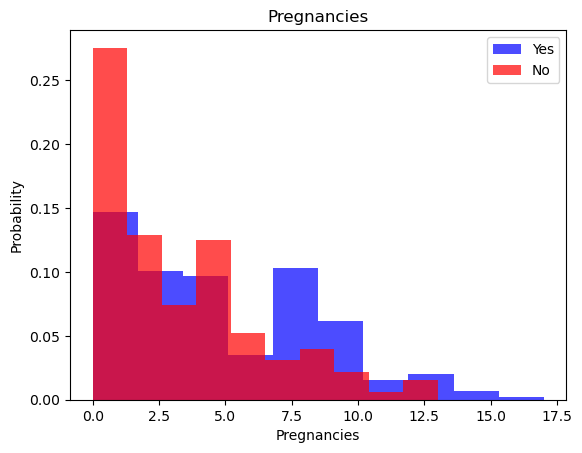

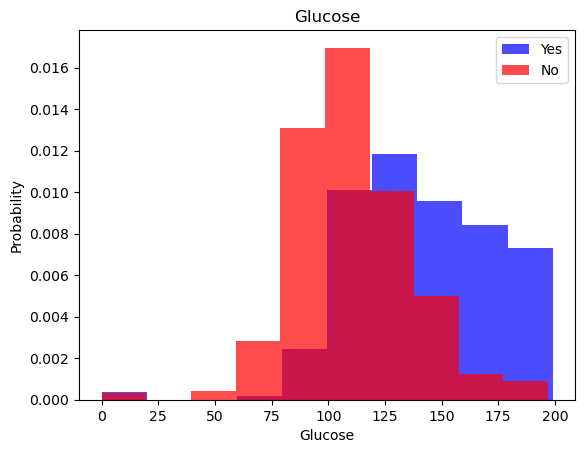

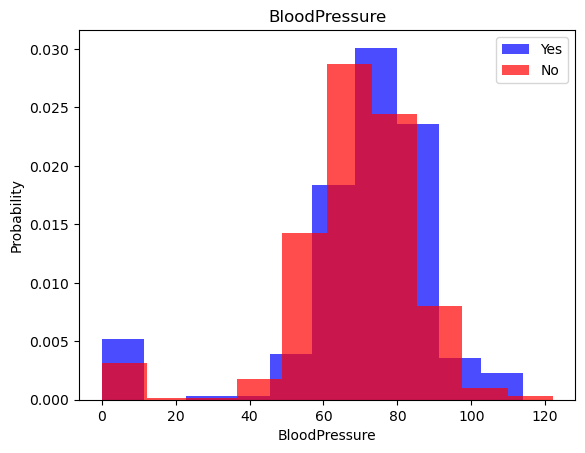

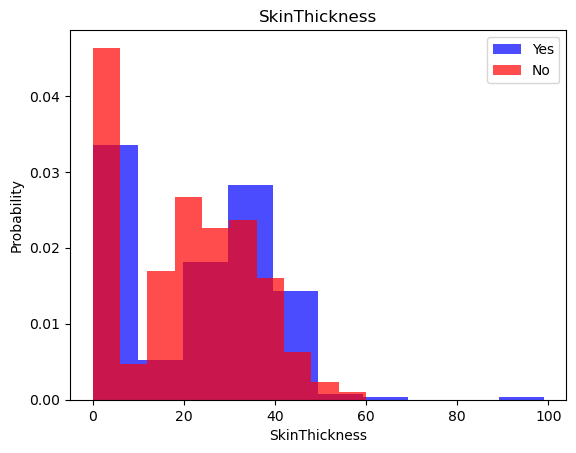

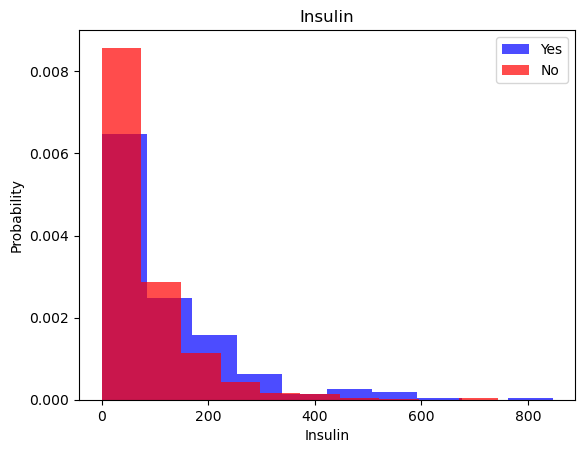

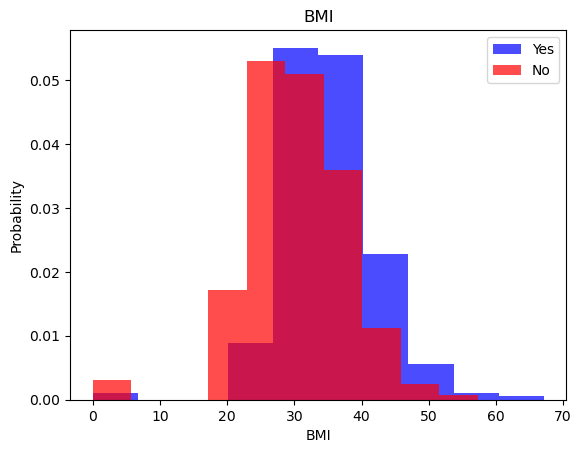

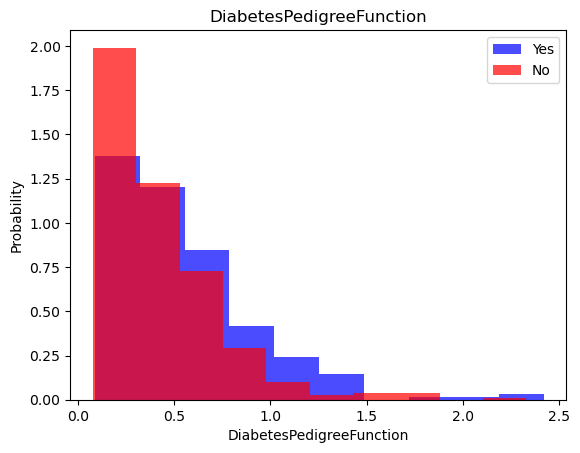

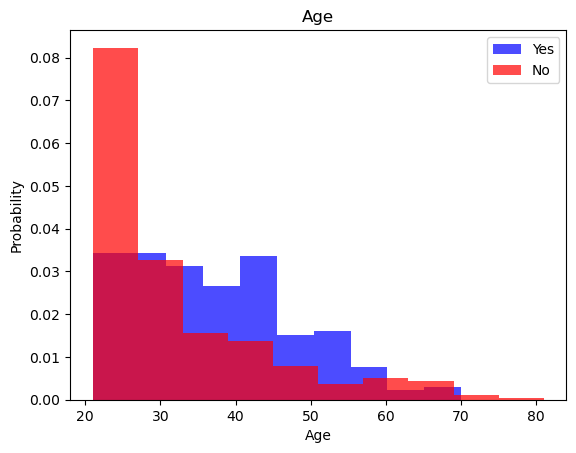

In [121]:
for label in columns:
    plt.hist(df[df['Outcome'] == 1][label], color='blue', label='Yes', alpha=0.7, density=True)
    plt.hist(df[df['Outcome'] == 0][label], color='red', label='No', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()


train,valid,test datasets

In [122]:
train, valid, test = np.split(df.sample(frac = 1,random_state=42),[int(0.6*len(df)), int(0.8*len(df))])

In [123]:
def scale_dataset(dataframe, oversample = False):
    # Ensure the input is a DataFrame
    if isinstance(dataframe, np.ndarray):
        dataframe = pd.DataFrame(dataframe)
        
    X = dataframe[dataframe.columns[:-1]].values
    Y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler(random_state=42)
        X,Y = ros.fit_resample(X,Y)

    data = np.hstack((X,np.reshape(Y,(-1,1))))

    return data,X,Y

In [124]:
print(len(train[train["Outcome"]==1]))
print(len(train[train["Outcome"]==0]))

162
298


In [125]:
train, X_train, Y_train = scale_dataset(train, oversample=True)
valid, X_valid, Y_valid = scale_dataset(valid, oversample=False)
test, X_test, Y_test = scale_dataset(test, oversample=False)

In [126]:
len(Y_train)

596

In [127]:
sum(Y_train==1)

298

In [128]:
sum(Y_train==0)

298

In [129]:
sum(Y_test==1)

58

In [130]:
sum(Y_test==0)

96

KNN

In [131]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [132]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [133]:
Y_pred = knn_model.predict(X_test)

In [134]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.80      0.77      0.78        96
           1       0.64      0.67      0.66        58

    accuracy                           0.73       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.73      0.74       154



Naive Bayes

In [135]:
from sklearn.naive_bayes import GaussianNB

In [136]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train,Y_train)

In [137]:
Y_pred = nb_model.predict(X_test)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80        96
           1       0.67      0.72      0.69        58

    accuracy                           0.76       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.76      0.76      0.76       154



Logistic Regression

In [138]:
from sklearn.linear_model import LogisticRegression

In [139]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train,Y_train)

In [140]:
Y_pred = lg_model.predict(X_test)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80        96
           1       0.67      0.71      0.69        58

    accuracy                           0.76       154
   macro avg       0.74      0.75      0.75       154
weighted avg       0.76      0.76      0.76       154



SVM


In [141]:
from sklearn.svm import SVC

In [142]:
svm_model = SVC()
svm_model = svm_model.fit(X_train,Y_train)

In [143]:
Y_pred = svm_model.predict(X_test)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80        96
           1       0.67      0.71      0.69        58

    accuracy                           0.76       154
   macro avg       0.74      0.75      0.75       154
weighted avg       0.76      0.76      0.76       154



Neural Net

In [144]:
!pip install tensorflow


1469559.38s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


In [151]:
import tensorflow as tf

In [156]:
def plot_history(history):
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))
    ax1.plot(history.history['loss'],label='loss')
    ax1.plot(history.history['val_loss'],label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')
    ax1.grid(True)
  
    ax2.plot(history.history['accuracy'],label='accuracy')
    ax2.plot(history.history['val_accuracy'],label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('accuracy')
    ax2.grid(True)

    plt.show()

In [158]:
def train_model(X_train, Y_train, num_nodes, dropout_prob,lr,batch_size,epochs):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation = 'relu', input_shape = (8,)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation = 'relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation = 'sigmoid')
])

    nn_model.compile(optimizer = tf.keras.optimizers.Adam(lr), loss = 'binary_crossentropy',
                metrics = ['accuracy'] ),
    history = nn_model.fit(
        X_train,Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2,verbose=0
)
    return nn_model,history

In [ ]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16,32,64]:
    for dropout_prob in[0,0.2]:
        for lr in [0.01,0.005,0.001]:
            for batch_size in [32,64,128]:
                print(f"{num_nodes}nodes,dropout{dropout_prob},lr{lr},batch size {batch_size}")
                model,history = train_model(X_train, Y_train, num_nodes, dropout_prob,lr,batch_size,epochs)
                plot_history(history)
                val_loss_metrics = model.evaluate(X_valid,Y_valid)
                val_loss = val_loss_metrics[0]
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_loss_model= model
               

In [171]:
Y_pred = least_loss_model.predict(X_test)
Y_pred = (Y_pred > 0.5).astype(int).reshape(-1,)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [172]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80        96
           1       0.70      0.55      0.62        58

    accuracy                           0.74       154
   macro avg       0.73      0.70      0.71       154
weighted avg       0.74      0.74      0.73       154



In [ ]:
Y_pred = 